# MNIST - Categorical Classification
> # Overfitting Issue
## Import Tensorflow

In [1]:
import warnings
warnings.filterwarnings('ignore')

* import TensorFlow 

In [2]:
import tensorflow as tf

tf.__version__

'2.5.0'

* GPU 설정 확인

In [3]:
tf.test.gpu_device_name()

'/device:GPU:0'

# I. MNIST Data_Set Load & Review

> ## 1) Load MNIST Data_Set

In [4]:
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

* Train_Data Information

In [5]:
print(len(X_train))
print(X_train.shape)

print(len(y_train))
print(y_train[0:5])

60000
(60000, 28, 28)
60000
[5 0 4 1 9]


* Test_Data Information

In [6]:
print(len(X_test))
print(X_test.shape)

print(len(y_test))
print(y_test[0:5])

10000
(10000, 28, 28)
10000
[7 2 1 0 4]


> ## 2) Visualization

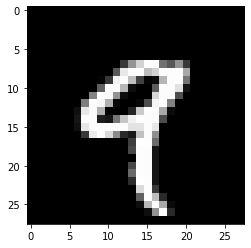

In [7]:
import matplotlib.pyplot as plt

digit = X_train[4]
plt.imshow(digit, cmap = 'gray')
plt.show()

In [8]:
import numpy as np
np.set_printoptions(linewidth = 150)

print(X_train[4])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0  55 148 210 253 253 113  87 148  55   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  87 232 252 253 189 210 252 252 25

# II. Data Preprocessing

> ## 1) Reshape and Normalization

* reshape
 * (60000, 28, 28) to (60000, 784)

In [9]:
X_train = X_train.reshape((60000, 28 * 28))
X_test = X_test.reshape((10000, 28 * 28))

X_train.shape, X_test.shape

((60000, 784), (10000, 784))

* Normalization

In [10]:
X_train = X_train.astype(float) / 255
X_test = X_test.astype(float) / 255

In [11]:
print(X_train[4])

[0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0. 

> ## 2) One Hot Encoding

In [12]:
from tensorflow.keras.utils import to_categorical

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [13]:
print(y_train[:5])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]]


# III. MNIST Keras Modeling

> ## 1) Model Define

* 모델 신경망 구조 정의
 - 2개의 Hidden Layers & 768개의 Nodes
 - 복잡한 Model Capacity로 인한 Overfitting

In [14]:
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.initializers import HeNormal

initializer = HeNormal()

mnist = models.Sequential()
mnist.add(layers.Dense(512, activation = 'relu', input_shape = (28 * 28,), kernel_initializer = initializer))
mnist.add(layers.Dense(256, activation = 'relu', kernel_initializer = initializer))
mnist.add(layers.Dense(10, activation = 'softmax', kernel_initializer = initializer))

* 모델 구조 확인

In [15]:
mnist.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 535,818
Trainable params: 535,818
Non-trainable params: 0
_________________________________________________________________


> ## 2) Model Compile

* 모델 학습방법 설정

In [16]:
mnist.compile(loss = 'categorical_crossentropy',
              optimizer = 'rmsprop',
              metrics = ['accuracy'])

> ## 3) Model Fit

* 약 3분

In [17]:
%%time

Hist_mnist = mnist.fit(X_train, y_train,
                       epochs = 100,
                       batch_size = 128,
                       validation_split = 0.2)

Epoch 1/100
375/375 [==============================] - 2s 4ms/step - loss: 0.2470 - accuracy: 0.9233 - val_loss: 0.1260 - val_accuracy: 0.9597
Epoch 2/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0924 - accuracy: 0.9714 - val_loss: 0.0951 - val_accuracy: 0.9718
Epoch 3/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0580 - accuracy: 0.9818 - val_loss: 0.0906 - val_accuracy: 0.9749
Epoch 4/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0406 - accuracy: 0.9871 - val_loss: 0.0939 - val_accuracy: 0.9750
Epoch 5/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0280 - accuracy: 0.9913 - val_loss: 0.1030 - val_accuracy: 0.9774
Epoch 6/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0218 - accuracy: 0.9927 - val_loss: 0.1010 - val_accuracy: 0.9763
Epoch 7/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0167 - accuracy: 0.9942 - val_loss: 0.0979 - val_accuracy: 0.9802

Epoch 58/100
375/375 [==============================] - 1s 4ms/step - loss: 8.2332e-04 - accuracy: 0.9998 - val_loss: 0.3488 - val_accuracy: 0.9808
Epoch 59/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0017 - accuracy: 0.9996 - val_loss: 0.3481 - val_accuracy: 0.9808
Epoch 60/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0011 - accuracy: 0.9998 - val_loss: 0.3418 - val_accuracy: 0.9803
Epoch 61/100
375/375 [==============================] - 1s 4ms/step - loss: 0.0014 - accuracy: 0.9998 - val_loss: 0.3499 - val_accuracy: 0.9787
Epoch 62/100
375/375 [==============================] - 1s 4ms/step - loss: 7.0204e-04 - accuracy: 0.9998 - val_loss: 0.3343 - val_accuracy: 0.9806
Epoch 63/100
375/375 [==============================] - 1s 4ms/step - loss: 6.5298e-04 - accuracy: 0.9998 - val_loss: 0.3351 - val_accuracy: 0.9797
Epoch 64/100
375/375 [==============================] - 1s 4ms/step - loss: 6.6346e-04 - accuracy: 0.9999 - val_loss: 0.3422

> ## 4) 학습 결과 시각화 - Overfitting

* Loss Visualization

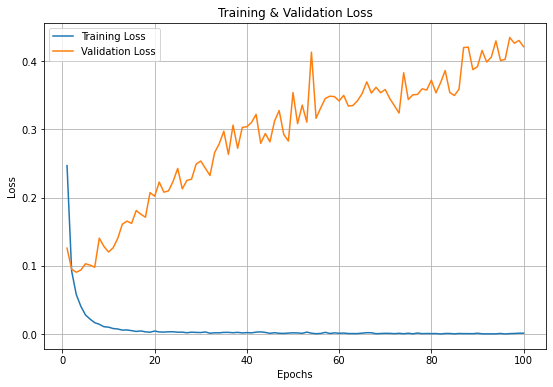

In [18]:
import matplotlib.pyplot as plt

epochs = range(1, len(Hist_mnist.history['loss']) + 1)

plt.figure(figsize = (9, 6))
plt.plot(epochs, Hist_mnist.history['loss'])
plt.plot(epochs, Hist_mnist.history['val_loss'])
# plt.ylim(0, 0.25)
plt.title('Training & Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])
plt.grid()
plt.show()

> ## 5) Model Evaluate

* Loss & Accuracy

In [19]:
loss, accuracy = mnist.evaluate(X_test, y_test)

print('Loss = {:.5f}'.format(loss))
print('Accuracy = {:.5f}'.format(accuracy))

313/313 [==============================] - 0s 2ms/step - loss: 0.3705 - accuracy: 0.9822
Loss = 0.37048
Accuracy = 0.98220


> ## 6) Model Predict

* Probability

In [20]:
np.set_printoptions(suppress = True, precision = 9)

print(mnist.predict(X_test[:1,:]))

[[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]


* Class

In [21]:
print(mnist.predict_classes(X_test[:1,:]))

[7]
